# Data Distributions Overview
A data distribution describes how values are spread or distributed across a range. Understanding distributions helps you:

- Identify patterns in your data
- Choose appropriate statistical methods
- Detect anomalies and outliers
- Make better predictions
- Understand the underlying processes generating your data

## Real-World Comprehensive Example

Business Data Distribution Analysis


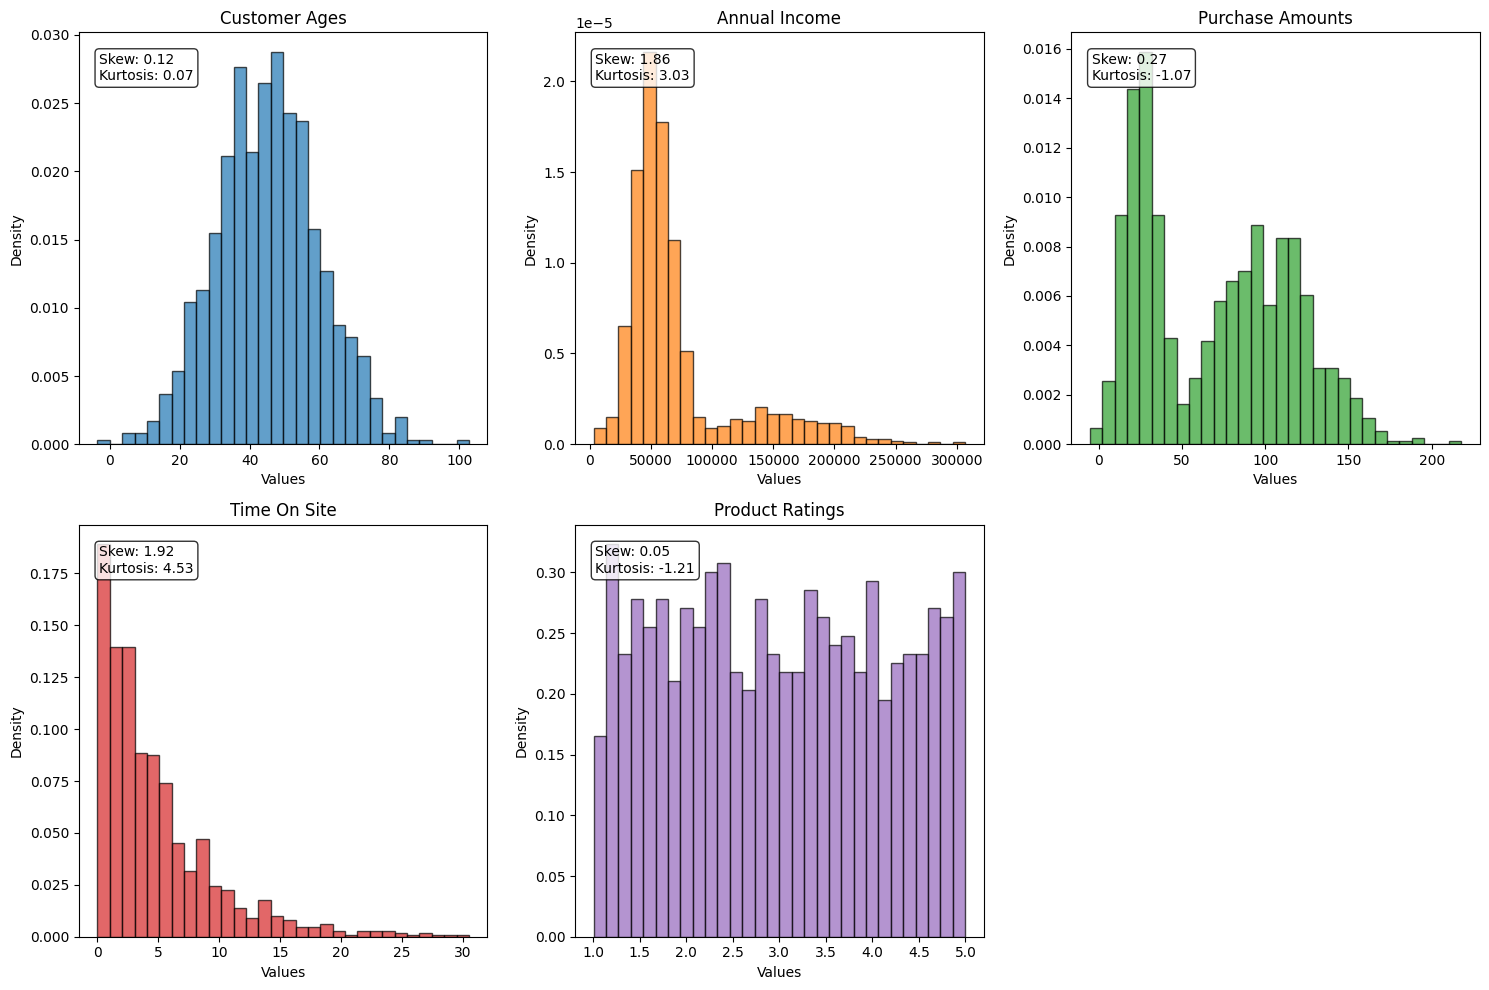


Statistical Summary:
           Variable       Mean     Median    Std_Dev  Skewness  Kurtosis  \
0     customer_ages     45.290     45.380     14.681     0.117     0.066   
1     annual_income  71193.691  55888.414  47466.650     1.855     3.031   
2  purchase_amounts     70.466     72.612     44.357     0.271    -1.073   
3      time_on_site      4.837      3.304      4.877     1.920     4.533   
4   product_ratings      2.995      2.942      1.158     0.046    -1.214   

                Distribution_Type  
0                     Normal-like  
1                    Right-skewed  
2  Symmetric with different tails  
3                    Right-skewed  
4  Symmetric with different tails  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def comprehensive_distribution_analysis():
    """Comprehensive analysis of different distributions in a business context"""
    
    np.random.seed(42)
    
    # Simulate business data with different distributions
    business_data = {
        'customer_ages': np.random.normal(45, 15, 1000),           # Normal
        'annual_income': np.concatenate([                          # Right-skewed
            np.random.normal(50000, 15000, 800),
            np.random.normal(150000, 50000, 200)
        ]),
        'purchase_amounts': np.concatenate([                       # Bimodal
            np.random.normal(25, 10, 400),    # Small purchases
            np.random.normal(100, 30, 600)    # Large purchases
        ]),
        'time_on_site': np.random.exponential(5, 1000),           # Exponential
        'product_ratings': np.random.uniform(1, 5, 1000)          # Uniform (discrete)
    }
    
    df = pd.DataFrame(business_data)
    df['product_ratings'] = np.round(df['product_ratings']).astype(int)  # Discrete ratings
    
    print("Business Data Distribution Analysis")
    print("=" * 50)
    
    # Analyze each variable
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, (column, data) in enumerate(business_data.items()):
        if i >= len(axes):
            break
            
        # Plot histogram
        axes[i].hist(data, bins=30, alpha=0.7, color=f'C{i}', edgecolor='black', density=True)
        axes[i].set_title(f'{column.replace("_", " ").title()}')
        axes[i].set_xlabel('Values')
        axes[i].set_ylabel('Density')
        
        # Add distribution information
        skewness = stats.skew(data)
        kurtosis = stats.kurtosis(data)
        
        axes[i].text(0.05, 0.95, f'Skew: {skewness:.2f}\nKurtosis: {kurtosis:.2f}', 
                    transform=axes[i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Remove empty subplot
    if len(business_data) < len(axes):
        for j in range(len(business_data), len(axes)):
            fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    
    # Statistical summary
    print("\nStatistical Summary:")
    summary_stats = []
    
    for column, data in business_data.items():
        summary_stats.append({
            'Variable': column,
            'Mean': np.mean(data),
            'Median': np.median(data),
            'Std_Dev': np.std(data),
            'Skewness': stats.skew(data),
            'Kurtosis': stats.kurtosis(data),
            'Distribution_Type': classify_distribution(data)
        })
    
    summary_df = pd.DataFrame(summary_stats)
    print(summary_df.round(3))
    
    return df, summary_df

def classify_distribution(data):
    """Classify distribution type based on statistical properties"""
    skew_val = stats.skew(data)
    kurt_val = stats.kurtosis(data)
    
    if abs(skew_val) < 0.5:
        if abs(kurt_val) < 1:
            return "Normal-like"
        else:
            return "Symmetric with different tails"
    elif skew_val > 0.5:
        return "Right-skewed"
    elif skew_val < -0.5:
        return "Left-skewed"
    else:
        return "Moderately skewed"

# Run the analysis
business_df, stats_summary = comprehensive_distribution_analysis()

## Distribution Identification Tools


Distribution Analysis: Normal Data
Basic Statistics:
  Mean: 99.4576
  Median: 99.1412
  Std Dev: 14.8179
  Skewness: 0.0527
  Kurtosis: -0.0077

Distribution Classification:
  Shapiro-Wilk p-value: 0.736543
  Normaltest p-value: 0.789061
  ✅ Data appears NORMAL
  Skewness: Approximately symmetric
  Kurtosis: Mesokurtic (normal tails)
  Mean/Median: Mean ≈ Median (symmetric)


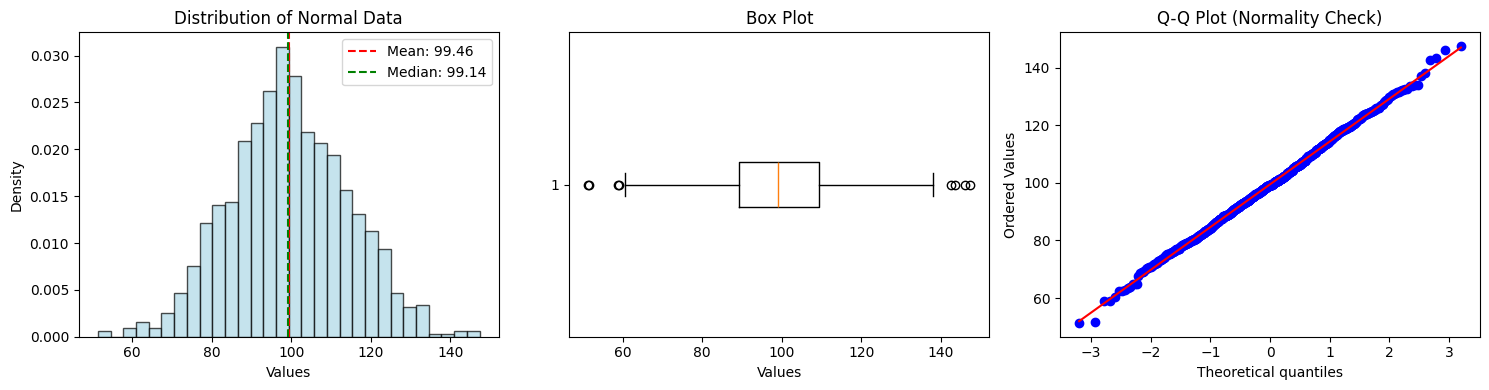


Distribution Analysis: Right-Skewed Data
Basic Statistics:
  Mean: 2.0057
  Median: 1.4551
  Std Dev: 1.8856
  Skewness: 1.4947
  Kurtosis: 2.3466

Distribution Classification:
  Shapiro-Wilk p-value: 0.000000
  Normaltest p-value: 0.000000
  ❌ Data does NOT appear normal
  Skewness: Right-skewed
  Kurtosis: Leptokurtic (heavy-tailed)
  Mean/Median: Mean > Median (right-skewed)


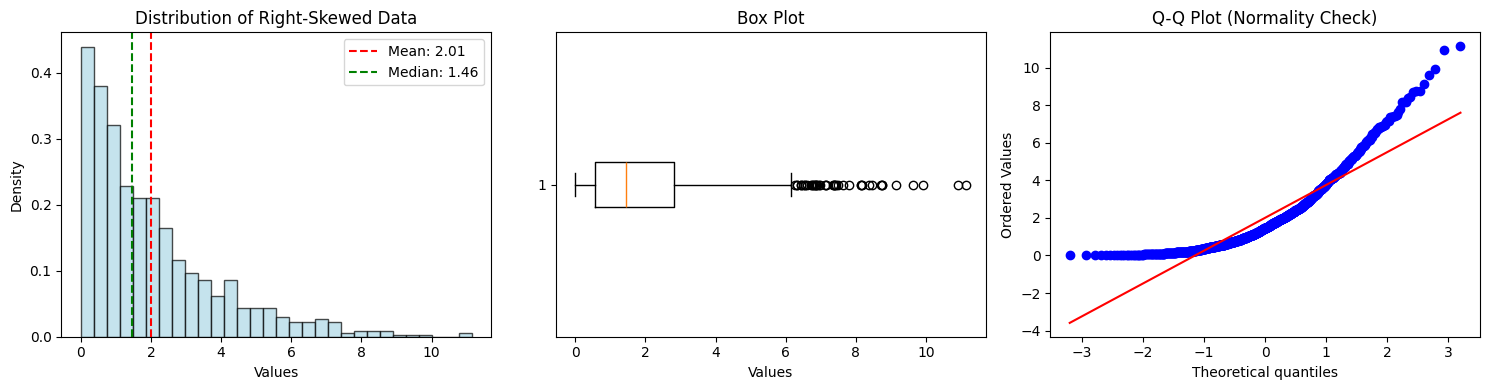


Distribution Analysis: Bimodal Data
Basic Statistics:
  Mean: 74.6020
  Median: 71.0034
  Std Dev: 27.5987
  Skewness: 0.2482
  Kurtosis: -1.1360

Distribution Classification:
  Shapiro-Wilk p-value: 0.000000
  Normaltest p-value: 0.000000
  ❌ Data does NOT appear normal
  Skewness: Approximately symmetric
  Kurtosis: Platykurtic (light-tailed)
  Mean/Median: Mean > Median (right-skewed)


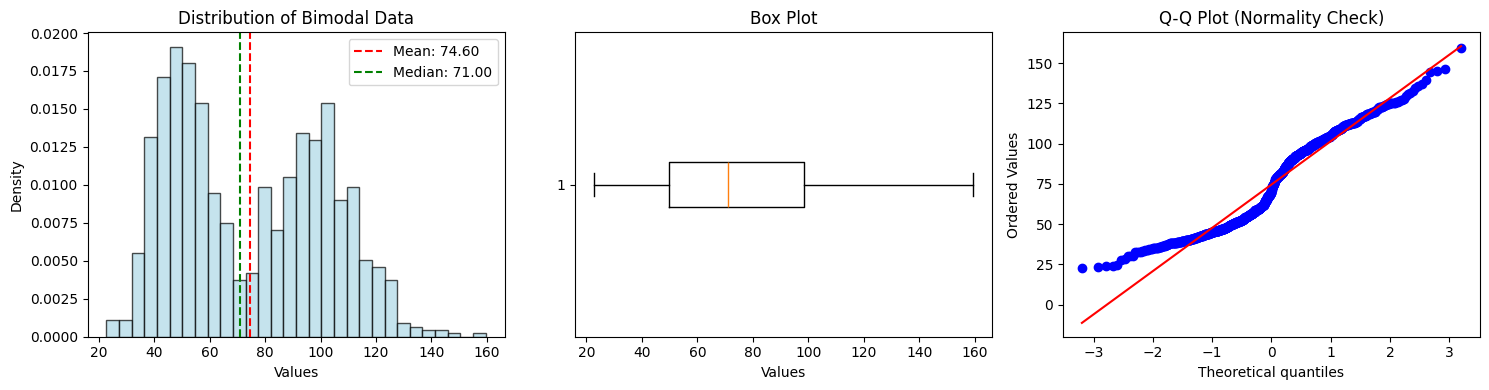

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def distribution_identifier(data, variable_name=""):
    """Comprehensive tool to identify distribution type"""
    
    print(f"\n{'='*60}")
    print(f"Distribution Analysis: {variable_name}")
    print(f"{'='*60}")
    
    # Basic statistics
    mean = np.mean(data)
    median = np.median(data)
    std = np.std(data)
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    
    print(f"Basic Statistics:")
    print(f"  Mean: {mean:.4f}")
    print(f"  Median: {median:.4f}")
    print(f"  Std Dev: {std:.4f}")
    print(f"  Skewness: {skewness:.4f}")
    print(f"  Kurtosis: {kurtosis:.4f}")
    
    # Distribution classification
    print(f"\nDistribution Classification:")
    
    # Check for normality
    _, shapiro_p = stats.shapiro(data) if len(data) < 5000 else (None, 0)
    _, normaltest_p = stats.normaltest(data)
    
    print(f"  Shapiro-Wilk p-value: {shapiro_p:.6f}")
    print(f"  Normaltest p-value: {normaltest_p:.6f}")
    
    if normaltest_p > 0.05:
        print("  ✅ Data appears NORMAL")
    else:
        print("  ❌ Data does NOT appear normal")
    
    # Skewness analysis
    if abs(skewness) < 0.5:
        skew_type = "Approximately symmetric"
    elif skewness > 0:
        skew_type = "Right-skewed"
    else:
        skew_type = "Left-skewed"
    print(f"  Skewness: {skew_type}")
    
    # Kurtosis analysis
    if kurtosis > 1:
        kurt_type = "Leptokurtic (heavy-tailed)"
    elif kurtosis < -1:
        kurt_type = "Platykurtic (light-tailed)"
    else:
        kurt_type = "Mesokurtic (normal tails)"
    print(f"  Kurtosis: {kurt_type}")
    
    # Mean vs Median comparison
    mean_median_ratio = mean / median
    if abs(mean_median_ratio - 1) < 0.05:
        mm_comparison = "Mean ≈ Median (symmetric)"
    elif mean > median:
        mm_comparison = "Mean > Median (right-skewed)"
    else:
        mm_comparison = "Mean < Median (left-skewed)"
    print(f"  Mean/Median: {mm_comparison}")
    
    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # Histogram with KDE
    axes[0].hist(data, bins=30, alpha=0.7, color='lightblue', edgecolor='black', density=True)
    axes[0].axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    axes[0].axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
    axes[0].set_title(f'Distribution of {variable_name}')
    axes[0].set_xlabel('Values')
    axes[0].set_ylabel('Density')
    axes[0].legend()
    
    # Box plot
    axes[1].boxplot(data, vert=False)
    axes[1].set_title('Box Plot')
    axes[1].set_xlabel('Values')
    
    # Q-Q plot
    stats.probplot(data, dist="norm", plot=axes[2])
    axes[2].set_title('Q-Q Plot (Normality Check)')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'mean': mean,
        'median': median,
        'std': std,
        'skewness': skewness,
        'kurtosis': kurtosis,
        'is_normal': normaltest_p > 0.05
    }

# Test with different distributions
test_data = {
    "Normal Data": np.random.normal(100, 15, 1000),
    "Right-Skewed Data": np.random.exponential(2, 1000),
    "Bimodal Data": np.concatenate([np.random.normal(50, 10, 500), np.random.normal(100, 15, 500)])
}

for name, data in test_data.items():
    distribution_identifier(data, name)